# Practical 1) Creating binned size distributions and calculating PM2.5

In our first practical, we are going to practice creating discrete size distributions before then calculaing the total mass loading for a range of ambient environments. Creating a size distribution can often feel like an ardous task and is a useful exercise in translating equations to code. This will also serve as a useful warm-up exercise for deploying a range of Python functions. You will have looked at Python as part of your training already; However learning to code wholst focusing on a domain relevant problem is often the best way to learn. With that in mind, today's first practical is comprised of 4 exercises across 3 main objectives.

<div class="alert alert-block alert-success">
<b>Objectives:</b> The objectives of todays practical are:

 - 1) [Objective 1 - Practice changing the shape of a normal and log-normal distribution ](#Part1)
      * [Exercise 1: Create 3 normal distributions and plot the results](#Exercise1)
      * [Exercise 2: Create 3 log-normal distributions and plot the results](#Exercise2)
 - 2) [Objective 2 - Populate a discrete 'binned' size distribution from a continuous function](#Part2)
      * [Exercise 3: Create a discrete size distribution with 30 bins](#Exercise3)
 - 3) [Objective 3 - Calculate PM2.5 mass](#Part3)
      * [Exercise 4: Sum to the total particulate mass for a range of environments](#Exercise4)

Please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them if useful. Proposed solutions to all exercises can be found in the 'Solutions' folder. There are often many ways to arrive at the solution of any particular problem, where choice of final method can rest on computational efficiency. We will discuss this later.
</div>

<div class="alert alert-block alert-warning">
<b>Please note:</b> After reading the instructions and aims of any exercise, if some boilerplate is already provided, search the code snippets for a note that reads ------'INSERT CODE HERE'------ to identify where you need to write your code 
</div>

## Objective 1 - Practice changing the shape of a normal and log-normal distribution  <a name="Part1">

The probability density of many phenomena in the natural world often follows a normal, or Gaussain, distribution. Algebraically, the probability density for the normal (Gaussian) distribution is given by:

\begin{equation}
p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} },   \tag{1}
\end{equation}

where $p(x)$ is the probability density, $\sigma$ is the standard deviation and $\mu$ is the mean. In some cases you may hear reference to $\mu$ as the location parameter and $\sigma$ as the scale parameter. Indeed, if you were to use the Python package Scipy's ```python scipy.stats.lognorm ``` function you would find such reference in the documentation. We are going to create our own normal and log-normal distributions.

A lognormal distribution is a normal distribution on a logarithmic scale. For aerosol particles that can span large ranges in magnitude, this is the most appropriate and perhaps commonly used distribution. Distinct from a normal distribution, a lognormal distribution has "geometric" mean diameter and a "geometric" standard deviation. As noted by [Jacobson 2005]() fifty percent of the area under a lognormal distribution lies below the geometric-mean diameter.  and 68 percent of the area under the lognormal distribution lies within one geometric standard deviation of the geometric-mean diameter.

The probability density for the log-normal distribution is
\begin{equation}
p(x) = \frac{1}{\sqrt{ 2 \pi log(\sigma_{g})^2 }} e^{ - \frac{ (log(x) - log(\mu))^2 } {2 log(\sigma_{g})^2} },
\end{equation}

A standard normal distribution can be visualised as per the following figure:

<img src="images/Normal_Distribution_PDF.png" alt="By Inductiveload - self-made, Mathematica, Inkscape, Public Domain, https://commons.wikimedia.org/w/index.php?curid=3817954" style="width: 500px;"/>



This brings us to exercise 1. 

<div class="alert alert-block alert-success">
<b> Exercise 1. Create 3 normal distributions and plot the results <a name="Exercise1"> </b> 
    
Using the defition of a normal distribution, you are tasked with now creating three different distributions and plotting the results. We are going to assume that each distribution has the same mean of 0 but 3 different standard deviations of 0.3, 1.0 and 1.3.

We are going to use the Numpy and Matplotlib libraries to create our arrays and plot results accordingly. As already noted above, this warm-up exercise will help you get a renewed feel for Python programming. You may find the following functions useful, assuming we have imported ```python numpy as np```:

```python
   np.linspace(lower, upper, num=xxx) # Creates an array with a lower and upper limit with xxx entries
   np.exp(xxx) # Calculates the exponential of a constant, variable or Numpy array
   np.sqrt(xxx) # Calculates the square root of a constant, variable or Numpy array
   np.pi # Gives us the constant 'pi'

```

In the code snippet below, as part of this exercise, I have imported the relevant libraries for you and also provided a plotting function. Notice I have assumed our x variable is called 'x' and our 3 different distributions are called 'distribution_1','distribution_2' and 'distribution_3'.  Once complete you should arrive at a plot that looks like the following:

![title <](images/Prac1_ex1.png)

</div>

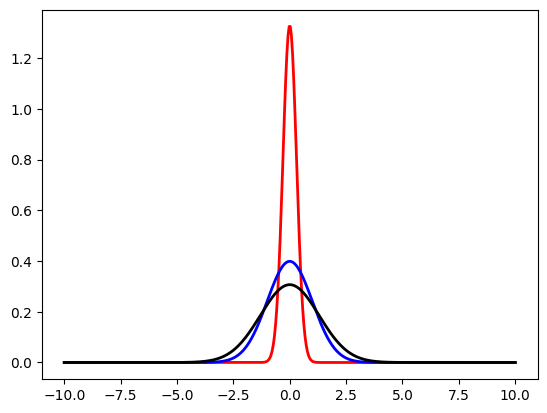

In [8]:
# Plot 3 different normal distributions with the same mean [0] but 3 different standard deviations of 0.3,1.0 and 1.3

import numpy as np
import matplotlib.pyplot as plt

#------'INSERT CODE HERE'------

# Define lower and upper limit of the size distribution [microns]
lower_size = -10 
upper_size = 10 

# Use the above information and the fact we want to create 400 values to create a numpy array
x = np.linspace(lower_size, upper_size, num=400) # values for x-axis

# Define the mean and standard deviation for each normal distribution
sigma1 = 0.3  
mean1 = 0 

sigma2 = 1  
mean2 = 0 

sigma3 = 1.3 
mean3 = 0 

# Now create each distribution using the mean, standard deviation and x array
distribution_1 = 1/(np.sqrt(2*np.pi*sigma1**2))  * np.exp(-(x-mean1)**2/(2*sigma1**2))
distribution_2 = 1/(np.sqrt(2*np.pi*sigma2**2))  * np.exp(-(x-mean2)**2/(2*sigma2**2)) 
distribution_3 = 1/(np.sqrt(2*np.pi*sigma3**2))  * np.exp(-(x-mean3)**2/(2*sigma3**2)) 

#------------------------------

plt.plot(x, distribution_1 , linewidth=2, color='r')
plt.plot(x, distribution_2 , linewidth=2, color='b')
plt.plot(x, distribution_3 , linewidth=2, color='k')
plt.show()

In exercise 2 below, we now create 3 lognormal distributions with the same mean but different geometric standard deviations. This is very similar to exercise 1. However, this time you will need to create a linearly spaced array in log(x) which is then used in your expression for defining the lognormal. Please read the instructions carefully.


<div class="alert alert-block alert-success">
<b> Exercise 2. Create 3 lognormal distributions and plot the results <a name="Exercise2"> </b> 
    
Using the defition of a log-normal distribution, you are tasked with now creating three and plotting the results. We are going to assume that each distribution has the same mean [in log space] but 3 different geometric standard deviations of 0.3, 1.0 and 1.3. As before, we are going to use the Numpy and Matplotlib libraries to create our arrays and plot results accordingly. I have imported the relevant libraries for you and also provided a plotting function. Notice I have assumed our x variable is now named 'x_log' to go into our definition of the lognormal. Also note that this time we are assuming we are using microns as our x axis. Again I assume our 3 different distributions are called 'distribution_1','distribution_2' and 'distribution_3'.  

You should define an x array that has a lower limit of 0.01 microns [10nm] and 20 microns and has 400 values. Your geomtric standard deviations are 0.3, 1.0 and 1.3. Your mean diameter in this problem is 800nm.

Once complete you should arrive at a plot that looks like the following:

![title <](images/Prac1_ex2.png)

</div>

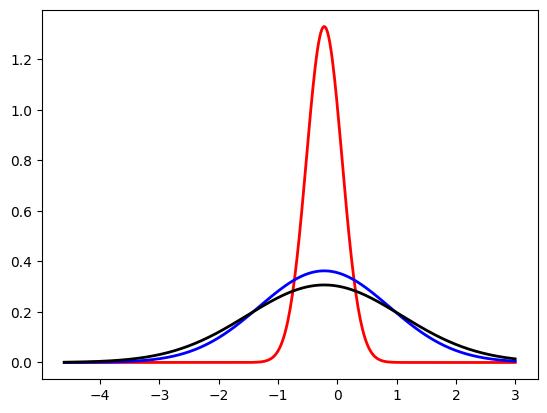

In [1]:
# plot 3 different log-normal distributions with a mean diameter of 800nm and geometric standard deviation of 1.1, 1.3 and 2.0
# This time assume our smallest starying point is 10nm and largest is 20 microns

import numpy as np
import matplotlib.pyplot as plt

# Define lower and upper limit of the size distribution [microns]
lower_size = 0.01 
upper_size =  20

#------'INSERT CODE HERE'------
x_log = np.linspace(np.log(lower_size), np.log(upper_size), num=400) # values for x-axis
sigmag1 = 0.3
mean1 =  np.log(0.8)


sigmag2 = 1.1
mean2 =  np.log(0.8)

sigmag3 = 1.3
mean3 =  np.log(0.8)

distribution_1 = 1/(np.sqrt(2*np.pi*sigmag1**2))  * np.exp(-(x_log-mean1)**2/(2*sigmag1**2))
distribution_2 = 1/(np.sqrt(2*np.pi*sigmag2**2))  * np.exp(-(x_log-mean2)**2/(2*sigmag2**2)) 
distribution_3 = 1/(np.sqrt(2*np.pi*sigmag3**2))  * np.exp(-(x_log-mean3)**2/(2*sigmag3**2)) 
#------------------------------

plt.plot(x_log, distribution_1 , linewidth=2, color='r')
plt.plot(x_log, distribution_2 , linewidth=2, color='b')
plt.plot(x_log, distribution_3 , linewidth=2, color='k')
#plt.savefig('sample_curve.png', dpi=800)
plt.show()

## Objective 2 -  Populate a discrete 'binned' size distribution from a continuous function <a name="Part2">

When modelling aerosol particles we represent the variation in particle size from the following:

 - Track each particle
 - Place particles into distinct size ranges
 - Assume a continuous distribution
 
The first, whilst [possible](https://www.atmos-chem-phys.net/14/5327/2014/), would require too much computational resource for complex systems. The third, whilst still used in large scale schemes and often called the modal approach, has limitations when we come to tracking invidual components. The second is the most popular and is known as the setional approach. This approach requires us to split the continuous size distribution into discrete size bins. We have used the log-normal approach above and will continue to do so. Limiting the number of bins in a model is often the easiest method of reducing computer-time and memory limits. We will discuss this in class. For now we need to cover all particle sizes with a fixed number of bins; The bins should be spread geometrically and we can thus look at a geomteric distribution known as the volume-ratio distribution. In this distribution, a fixed volume ratio between bins defines the centre of the bin and bin width. We will see in this exercise that we can also simply choose linearly seperated values in log diameter space. The figure below, taken from the [Fundamentals of Atmospheric Modelling]() illustrates the concept:


<img src="images/jacobson_fig131.png" alt="Drawing" style="width: 300px;"/>


There are a number of formaulas we need to use to create this discrete distribution.

$$
\begin{align}
V_{rat}=\left ( \frac{d_{Nb}}{d_{1}} \right )^{3/(N_{b}-1)}  \tag{1}
\\
D_{rat} = V_{rat}^{1/3}
\\
v_{i}=V_{rat}v_{i-1} \text{ for i=1 to} N_{b}   \tag{1}
\\
v_{i}= \frac{1}{2}\left ( v_{i,hi} + v_{i,lo} \right )   \tag{1}
\\
v_{i,hi}= V_{rat}v_{i,lo}   \tag{1}
\\
v_{i,lo}= \frac{2v_{i}}{1+V_{rat}}   \tag{1}
\\
\Delta d_{i} = d_{i,hi}-d_{i,lo}=d_{i}2^{1/3}\frac{V_{rat}^{1/3}-1}{(1+V_{rat})^{1/3}}    \tag{1}
\\
n_{i} = \frac{N_{L}\Delta d_{i}}{d_{i}\sqrt{2\pi }ln\sigma _{g}}exp\left [ -\frac{ (log(x) - log(\mu))^2 } {2 log(\sigma_{g})^2} \right ]   \tag{1}
\end{align}
$$

where each variable is defined as follows:

| Variable | definition |
|------|------|
| $V_{rat}$ | Volume ratio between bins | 
| $D_{rat}$ | Diameter ratio between bins | 
| $d_{Nb}$ |  Diameter of largest bin | 
| $d_{1}$ | Diameter of smallest bin  | 
| $d_{i}$ | Diameter of particle in bin i  | 
| $N_{b}$ | Number of size bins | 
| $v_{i}$ | Volume of a particle in size bin i | 
| $v_{i,hi}$ | Upper volumne of a particle in size bin i | 
| $v_{i,lo}$ | Lower volumne of a particle in size bin i | 
| $\Delta d_{i}$ | Diameter width of size bin i | 
| $\sigma_{g}$ | Standard deviation of lognormal distribution |
| $\mu$ | Mean diameter of lognormal distribution |
| $x$ | Diameter array of lognormal distribution |
| $N_{L}$ | Total number of aerosol particles |

The following schematic illustrates how each variable maps onto a hypothetical log-normal discrete distribution:

<img src="images/Binned_size_distribution.png" alt="Drawing" style="width: 600px;"/>


<div class="alert alert-block alert-success">
<b> Exercise 3. Create a discrete "volume ratio" log-normal distribution and populate number concentrations to each bin <a name="Exercise3"> </b> 
    
This is quite an involved exercise. We need to go through a series of steps to create our discrete lognormal distribution that has a mean of 150nm, standard deviation of 1.7 and total number of particles of 600 per cubic centimetre:

 - Define a lower and upper limit to our size distribution
 - Calculate a volume ratio for a specific number of bins
 - Calculate a diameter ratio
 - Create an array of diameters
 - Calculate the diameter width of each size bin
 - Calculate the log-normal probability density for our diameter array
 - Combine the last two elements with the total number to populate a discrete number distribution
 - Plot the results
 
In the code snippet below I have started the exercise with the lower and upper bin boundary and desired number of size bins [30]. I have also defined the name of each required variable and array before leaving the plotting routine. Please note we are still working in microns and the number concentration is given in number per cubic centimetre.

Once completed, your plot should look like the following:

![title <](images/Prac1_ex3.png)

</div>

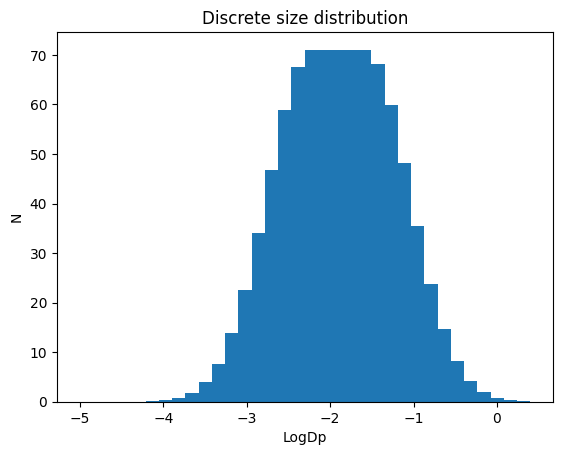

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Volume ratio discrete distribution

d1 = 0.01 # Lowest size diameter
d_Nb = 1.0 # Diameter of largest bin [microns]
Nb = 30 # Number of size bins

#------'INSERT CODE HERE'------
di = np.exp(np.linspace(np.log(d1), np.log(d_Nb), num=30)) # values for x-axis
#log_di = np.linspace(np.log(d1), np.log(d_Nb), num=30)
#print(di)

V_rat = (d_Nb/d1)**(3/(Nb-1)) # Volume ratio between bins
d_rat = V_rat**(1/3) # Diameter ratio between bins

# Use the volume ratio to create an array of diameters as follows
d_i=np.zeros((Nb), dtype=float) # Diameter array 
d_i[0]=d1
for step in range(Nb):
    if step > 0:
       d_i[step]= d_rat*d_i[step-1]

log_di = np.log(d_i) # Log of Diameter array 

# Create an array of lower bin boundaries
vi = (4.0/3.0)*np.pi*np.power(d_i/2.0,3.0) # sphere formula 
vi_low = 2.0*vi/(1.0+V_rat)
vi_hi = V_rat*vi_low
di_low = 2.0*(np.power(vi_low/((4.0/3.0)*np.pi),(1.0/3.0)))
di_hi = 2.0*(np.power(vi_hi/((4.0/3.0)*np.pi),(1.0/3.0)))

d_width = di_hi - di_low #d_i * 2**(1/3) * (V_rat**(1/3)-1)/((1+V_rat)**(1/3))

# Parameters of log-normal distribution
sigmag1 = np.log(1.7) # Geometric standard deviation
mean1 = np.log(0.15) # Mean particle size [150nm]
distribution_1 = 1/(np.sqrt(2*np.pi*sigmag1**2))  * np.exp(-(log_di-mean1)**2/(2*sigmag1**2))

Ntot = 600.0 # Total number of particles [per cm-3]
N_dist = Ntot * d_width / d_i * distribution_1# Discrete number distribution
#------------------------------

plt.bar(log_di, N_dist)
plt.ylabel(r'N')
plt.xlabel(r'LogDp')
plt.title(r'Discrete size distribution')
plt.show()
plt.show()

## Objective 3 - Calculate PM2.5 mass  <a name="Part3">
    
You will have come across the metric PM2.5 when discussing air quality. As the total mass of sampled particulates below 2.5 microns, it has been used historically as a measure of ambient concentrations. Whilst a relatively crude metric, certainly as we learn more about [differential toxicity and size effects on human health](http://www.euro.who.int/__data/assets/pdf_file/0006/189051/Health-effects-of-particulate-matter-final-Eng.pdf), we can play with multiple size distributions and relate these to expected levels of PM2.5. For example, in an urban environment dominated by a large number of fine more aerosol, how does the PM2.5 mass compare with an environmnt where a lower number of accumulation mode aerosol dominate?

<div class="alert alert-block alert-success">
<b> Exercise 4. Calculate the PM2.5 mass associated with the size distribution  <a name="Exercise3"> </b> 
    
Using the same distribution as above, calculate PM2.5 mass assuming the particles have a density of 1400kg.m-3 which is a good approximation for secondary organics. Please note your final answer should be given in $\mu g.m^{-3}$, so you should perhaps check unit coversions on paper. Do you arrive at a mass of ~5.14 $\mu g.m^{-3}$?

Following this, try to find some different size distributions and calculate the total PM2.5 mass. As an added challenge, rather than doing this within the jupyter notebook environment, create a seperate Python script and run this from the command line.


</div>

In [53]:
# Total mass in micrograms per cubic metre
#------'INSERT CODE HERE'------
density = 1400.0 #kg.m-3
total_mass = np.sum(np.dot(N_dist*1e6, vi))*density*1e-9
#------------------------------
print(total_mass, " ug/m3")

[5.23598776e-07 8.43131226e-07 1.35766220e-06 2.18619188e-06
 3.52034177e-06 5.66867268e-06 9.12804837e-06 1.46985497e-05
 2.36685164e-05 3.81125132e-05 6.13711328e-05 9.88236047e-05
 1.59131898e-04 2.56244053e-04 4.12620068e-04 6.64426428e-04
 1.06990065e-03 1.72282038e-03 2.77419224e-03 4.46717643e-03
 7.19332457e-03 1.15831374e-02 1.86518863e-02 3.00344243e-02
 4.83632930e-02 7.78775742e-02 1.25403301e-01 2.01932173e-01
 3.25163710e-01 5.23598776e-01]
5.142161209310858  ug/m3
